In [1]:
import pyUSCRN as pu
stn_list = pu.filter_stations()
stn_header, data = pu.read_merge_sites_for_single_variable(stn_list.ID, 
                                               VARS = ['T_MONTHLY_AVG'],
                                               scale = 'monthly',
                                               DATES=['2000-01-01','2018-12-31'])
data2 = data.to_xarray()
data3 = data2.groupby('index.month') - data2.groupby('index.month').mean('index')
data3 = data3.drop('month').to_dataframe()
data3 = data3.mean(axis=1).resample('A', how='mean')

merging (139) stations.........................................................................................................................................DONE


Text(0, 0.5, 'Temperature Anomaly ($^\\circ$C)')

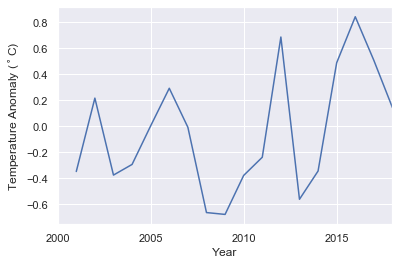

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

data3.plot()

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly ($^\circ$C)')

In [3]:
data3.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='index', freq='A-DEC')